# 単回帰分析

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

In [3]:
# 米国ボストン市郊外における地域別の住宅価格のデータセット
test_data = datasets.load_boston()
df = pd.DataFrame(test_data.data, columns=test_data.feature_names)

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## 二乗誤差関数&最小二乗法

$
E = \sum_{i=1}^{N}{y_i-(ax_i+b)}^2
$

$
\frac{\partial E}{\partial a} = 0, \frac{\partial E}{\partial b} = 0
$

$
\left\{
\begin{array}{ll}
\frac{\partial E}{\partial a} = \frac{\partial}{\partial a}[\sum_{i}(y_i-a_i-b)^2] = 0 \\
\frac{\partial E}{\partial b} = \frac{\partial}{\partial b}[\sum_{i}(y_i-a_i-b)^2] = 0
\end{array}
\right.
$
<br><br><br>
(中略)
<br><br>


$
\hat{y} = \frac{\sigma xy}{\sigma^2x} x + (\overline{y} - \frac{\sigma xy}{\sigma^2x}\overline{x})
$


In [4]:

# 小売業以外の商業が占める面積の割合
test_arr_X = df.loc[:,"INDUS"]
#  5 つのボストン市の雇用施設からの距離
test_arr_Y = df.loc[:,"DIS"]
test_arr_XY = df.loc[:,["INDUS", "DIS"]].values

# 平均
test_arr_X_mean = np.mean(test_arr_X)
test_arr_Y_mean = np.mean(test_arr_Y)



In [5]:
# 共分散
test_arr_cov = np.cov(test_arr_X, test_arr_Y)[0][1]

# 分散
test_arr_var = np.var(test_arr_XY)

In [6]:
a = test_arr_cov / test_arr_var
b = test_arr_Y_mean - (a * test_arr_X_mean)

C:\Users\N398\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


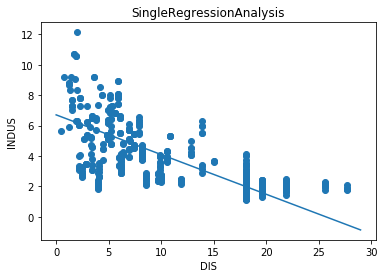

In [7]:
# 回帰直線
x = np.arange(0, 30, 1)
y = a * x + b 

# 描画
fig = plt.figure()

ax = fig.add_subplot(1,1,1)

ax.scatter(test_arr_X,test_arr_Y)
ax.plot(x, y)

ax.set_title('SingleRegressionAnalysis')
ax.set_xlabel('DIS')
ax.set_ylabel('INDUS')

fig.show()